# A particle's pitch angle at any point in a magnetic field line is a random variable

By taking an analogy of pitch angle distribution $f(\alpha,\lambda)$, pitch angle $\alpha$, and latitude $(\lambda)$, with another set of variables: position distribution (of particles) $f(x,t)$, position $x$, and time $t$, we hope to show that we can use variable separation on pdfs by claiming $x(0)$ and $x(t)$ are two different random variables to give correct result. Note that in this analogy, there is an equation of motion: 

$$\alpha_{\lambda} = \sin^{-1}( k \ sin(\alpha_{\lambda=0}))$$ 

which is analogous to the equation of motion: 

$$x(t) = x^2_{t=0} \cdot (1 + 2 \cdot t^2)$$.   

If we know the pdf at time $t=0$ (or $\lambda = 0$), and wish to find the pdf at some time $t$ (or $\lambda$), given the above equations of motion that relate $x(t=0)$ to $x(t)$, then numerically it can be done as follows. Start with an intial $x(0)$ based on some distribution you define (and hence know), and plug the outputs of the random variable $x(t=0)$ into the equations of motions, and derive $x(t)$ for each corresponding $x(0)$, and plot a histogram to see the pdf at $x(t)$. Here

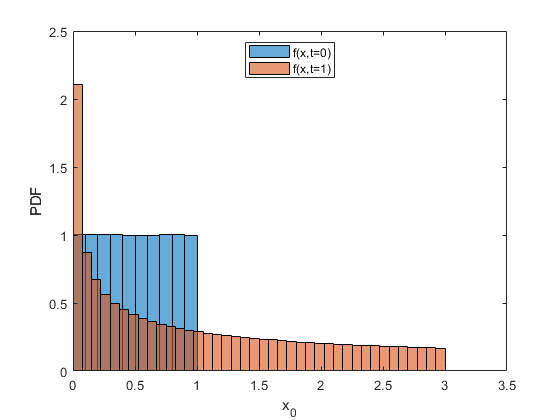

In [18]:
f1 = makedist('Uniform','lower',0,'upper',1);
x0 = random(f1,1,10000000)';
t = 0:0.1:1;
x = x0.^2 + 2.*x0.^2.*t.^2;
f2 = makedist('Uniform','lower',0,'upper',1/3); % f2 = f1/3; 

histogram(x0,10,'Normalization','pdf');
hold on;
histogram(x(:,11),40,'Normalization','pdf');
legend('f(x,t=0)','f(x,t=1)','Location','north');
xlabel('x_0');
ylabel('PDF');
xlim([0,3.5]);
ylim([0,2.5]);

However, when you make the assumption that $t$ is implicit, and the distribution is simply a uni-dimensional one, $f(x(t))$, and decide to consider $x(0)$ and $x(t)$ to be two separate random variables related through the equation of motion we encounter, the calculation of the new pdf $f(x(t))$ from the initial pdf $f(x(0))$ is as follows:

$$ f(x(t)) = f(x(0)) \frac{dx(0)}{dx(t)} = f(x(0))\frac{1}{2 \cdot x(0) \cdot (1+2t^2)} $$

This implies, that like previously if we choose to evaluate the pdf at $t=1$, we get 

$$ f(X(1)) = \frac{f(x(0))}{6 \cdot x(0)}$$

See the red line $f(x(0))$, in comparison to the blue line $f(x(1))$ below. This seems to make sense. 

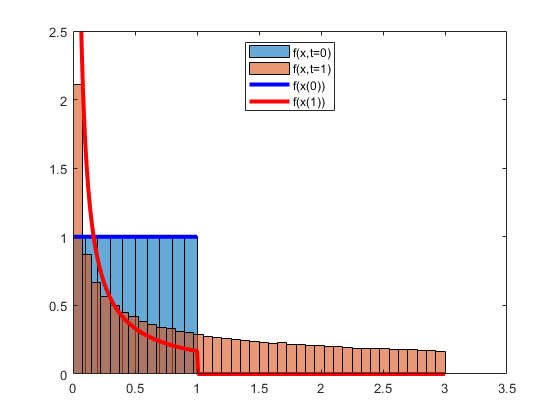

In [17]:
histogram(x0,10,'Normalization','pdf');
hold on;
histogram(x(:,11),40,'Normalization','pdf');
hold on;
plot(0:0.01:1,pdf(f1,0:0.01:1),'b','LineWidth',3);
hold on;
plot(0:0.01:3,pdf(f1,0:0.01:3)./(6.*(0:0.01:3)),'r','LineWidth',3);

legend('f(x,t=0)','f(x,t=1)','f(x(0))','f(x(1))','Location','north');
xlim([0,3.5]);
ylim([0,2.5]);